In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.model_selection import cross_validate

In [32]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.replace('?',-99999,inplace=True) #wird von meisten algos als outlier erkannt, in praxis üblich dass viele Daten fehlen
df.drop(['id'],1,inplace=True)

C:\Users\Paddy\AppData\Local\Temp/ipykernel_3792/4207292106.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'],1,inplace=True)


In [33]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [34]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

C:\Users\Paddy\AppData\Local\Temp/ipykernel_3792/2714413610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['class'],1))


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
accuracy = knn.score(X_test, y_test)

In [77]:
print(accuracy)

0.9523809523809523


In [78]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[132   6]
 [  4  68]]


In [68]:
fehlerRate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    fehlerRate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Fehler Rate')

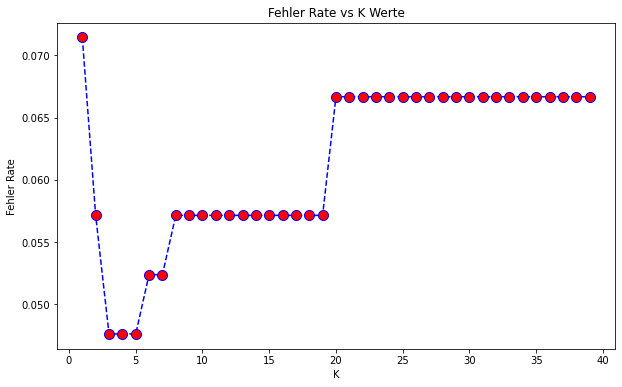

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),fehlerRate,color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Fehler Rate vs K Werte')
plt.xlabel('K')
plt.ylabel('Fehler Rate')